### Thunderhill Birds-Eye Perspective Transform

0.00168 Seconds for birds_eye...
0.00123 Seconds for birds_eye...
0.0012 Seconds for birds_eye...
0.00107 Seconds for birds_eye...
0.00104 Seconds for birds_eye...
0.00104 Seconds for birds_eye...
0.00115 Seconds for birds_eye...
0.001 Seconds for birds_eye...
0.00097 Seconds for birds_eye...
0.00097 Seconds for birds_eye...
0.001135 Seconds for birds_eye...


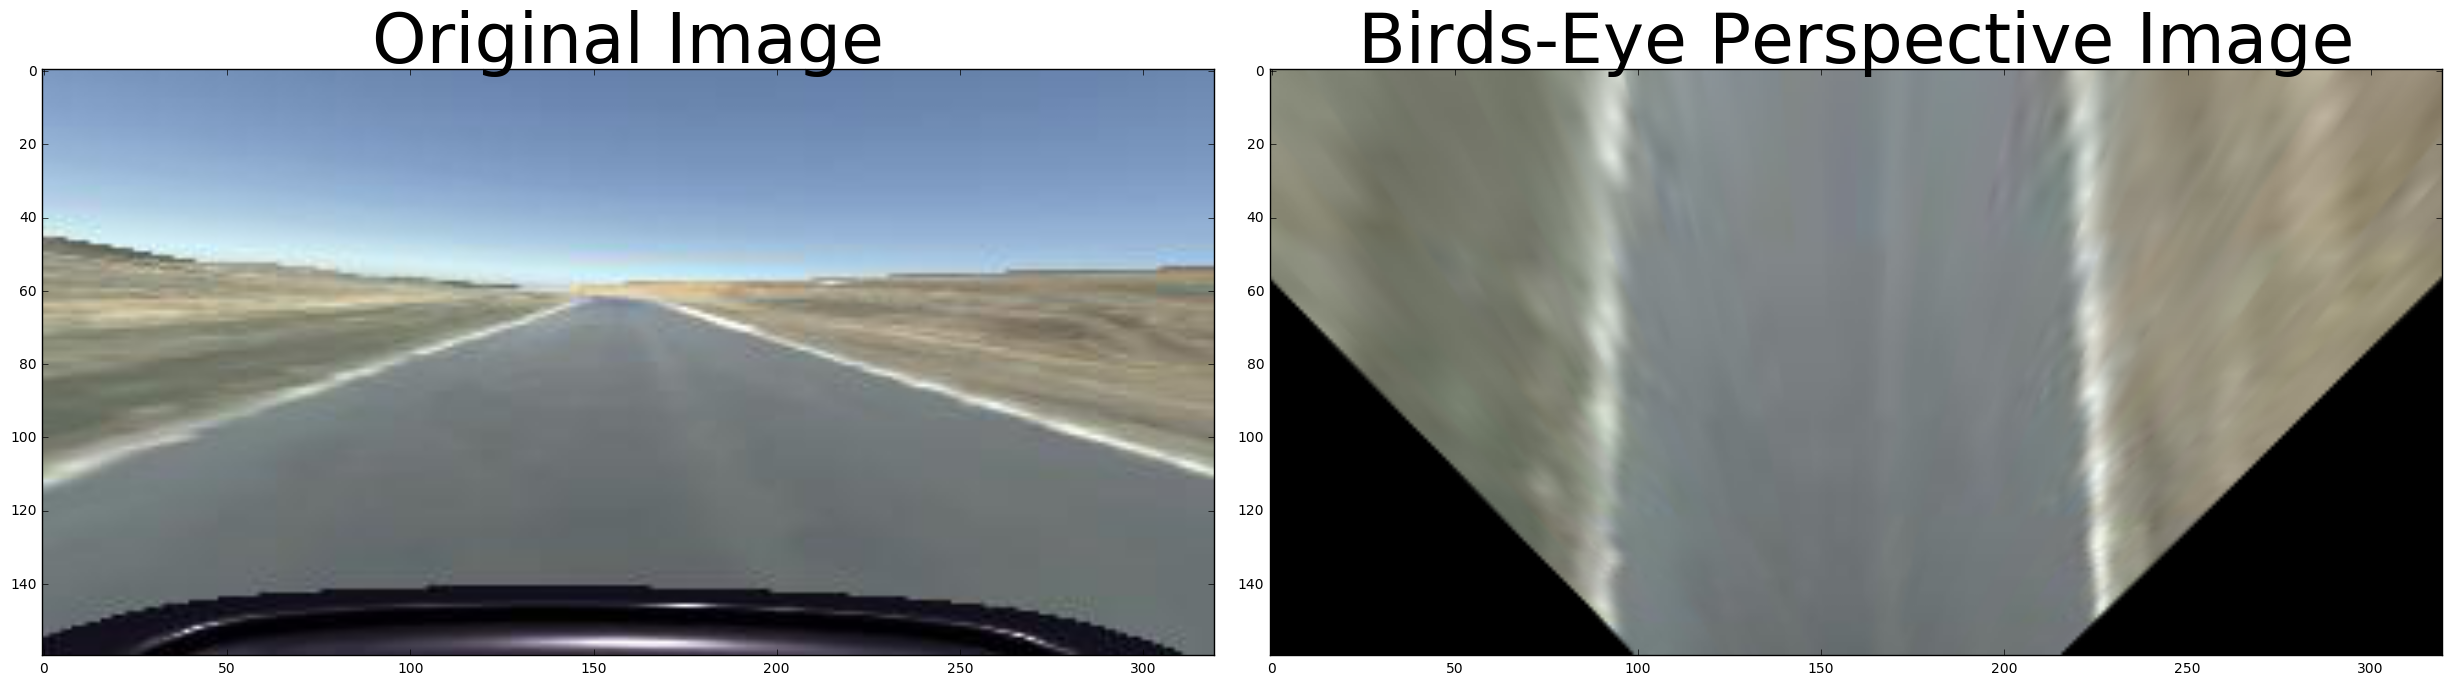

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.misc import imsave
import time
from scipy.misc import imread, imresize, imsave
import glob
%matplotlib inline


def birds_eye(img):      
    # Grab the image shape
    img_size = (img.shape[1], img.shape[0])
    
    # Four Source Points
    src = np.float32(
        [[100, 75],
         [0, 120],
         [200, 75],
         [320, 120]])
    
    # Four Destination Points
    dst = np.float32(
        [[80, 0],
         [100, 160],
         [215, 0],
         [215, 160]])
    
    # Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    # Return the resulting image and matrix
    return warped, Minv

img = cv2.imread('./test_images/center_2017_03_04_20_40_32_996.jpg')

average = []
for i in range(10):
    t = time.time()
    bird, Minv = birds_eye(img)
    t2 = time.time()
    print(round(t2-t, 5), 'Seconds for birds_eye...')
    average.append(t2-t)

final = np.mean(average)
print(round(final, 6), 'Seconds for birds_eye...')

# Now plot an example of the birds eye view
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(cv2.cvtColor(bird, cv2.COLOR_BGR2RGB))
ax2.set_title('Birds-Eye Perspective Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)  

### Make a video of results

In [2]:
from __future__ import print_function

import argparse
import sys
import numpy as np
import h5py
import pygame
import json
import pandas as pd
from os import path
import time

import pylab
from pygame.locals import *

pygame.init()
size = (320*2, 160*2)
pygame.display.set_caption("sim data viewer")
screen = pygame.display.set_mode(size, pygame.DOUBLEBUF)
screen.set_alpha(None)
images = glob.glob('/IMG/center*.jpg')

camera_surface = pygame.surface.Surface((320,160),0,24).convert()
clock = pygame.time.Clock()

for image in images:
    img = cv2.imread(image) #.swapaxes(0,2).swapaxes(0,1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img, Minv = birds_eye(img)

    # draw on
    pygame.surfarray.blit_array(camera_surface, img.swapaxes(0,1))
    camera_surface_2x = pygame.transform.scale2x(camera_surface)
    screen.blit(camera_surface_2x, (0,0))
    clock.tick(25)
    pygame.display.flip()

KeyboardInterrupt: 